# Predicting Human Activity From Sensor Data

Human Activities are the various daily actions which humans do, this action varies from walking, sleeping, eating, running, jumping, cycling to name few. 

* This project will be approached using six (6) different ways as stated below

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

Given a sensor data collected on different human activity, can a model be developed to predict the activity which is being done

## 2. Data
The data for this analysis was derived by me. An Oppo A9 Mobile phone was used where matlab mobile app was used to capture the sensor data. The sampling rate used for the activities was 20hz for a duration of 2minuites. Three sensor datas  were collected for this analysis namely; 

1. Running
2. Sitting
3. Sleeping

## Evaluation
It is agreed with the team that if we can reach an accuracy of 90-95% in predicting the activity being done by the human, the model is good enough

## Features
This sections talks about the different parts of the data 

* For every activity log gotten through the sensor, four sensors were derived in three dimension (X,Y and Z)

1. Acceleration: This is the rate of change in velocity of an object with respect to time
    * Acc_X - Acceleration in the X direction
    * Acc_Y - Acceleration in the Y direction
    * Acc_Z - Acceleration in the Z direction
2. Magnetic Field: The region around a magnet or electric field (which creates a magnetic effect) where the forces is felt
    * Mag_X - Magnetic Field in the X direction
    * Mag_Y - Magnetic Field in the Y direction
    * Mag_Z - Magnetic Field in the Z direction
3. Angular Velocity: This is also called angular frequency and it is the measurement of how fast an object rotates relative to another point.
    * AngV_X - Angular Velocity in the X direction
    * AngV_Y - Angular Velocity in the Y direction
    * AngV_Z - Angular Velocity in the Z direction
4. Orientation:The position of the mobile device relation to a point
    * Orin_X - Orientation in the X direction
    * Orin_Y - Orientation in the Y direction
    * Orin_Z - Orientation in the Z direction

## Preparing tools

This is the bringing in of all important libraries needed to do
1. Exploratory Data Analysis (EDA)
2. Modelling
3. Evaluation

In [150]:
# Importing all tools 

# Regular EDA and plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Nueral Networks for Deep Learning
import tensorflow
tensorflow.__version__
from tensorflow.keras.models import Sequential  # used to create neural network (a sequesnce of layers)
from tensorflow.keras.layers import Dense # one neuron in one layer connected to all other layers in the next layer
from keras.utils import np_utils

In [151]:
# Setting the style for my plots
sns.set_style('whitegrid')

### Checking my directory so I can determine where my files for analysis will be placed

In [152]:
pwd

'C:\\Users\\OLUWOLE BANJOKO\\Desktop\\MSc Data Science\\CIS7031- PROGRAMMING FOR DATA ANALYSIS\\Assignment'

### Loading my Sensor Data one Activity after Activity

In [153]:
runningAcc = pd.read_excel('Running_Acceleration.xlsx',sheet_name='Sheet1')
runningAngV = pd.read_excel('Running_AngularVelo.xlsx',sheet_name='Sheet1')
runningMag = pd.read_excel('Running_MagneticField.xlsx',sheet_name='Sheet1')
runningOrin = pd.read_excel('Running_Orientation.xlsx',sheet_name='Sheet1')

In [154]:
# It is good practice to make a copy of the data so that changes will not have an effect on the original dataset
runAcc = runningAcc.copy()
runAngV = runningAngV.copy()
runMag = runningMag.copy()
runOrin = runningOrin.copy()

#### Checking to have a view of the data
checking some head and tail to be sure the dataset loaded correctly

In [155]:
# Checking the first five (5) rolls of the running Acceleration dataset
runAcc.head()

Timestamp     Acc_X     Acc_Y     Acc_Z
0 2021-10-03 10:44:09.344  0.384048  3.808177  9.644720
1 2021-10-03 10:44:09.394 -0.176172  3.249902  9.384202
2 2021-10-03 10:44:09.444  0.100947  3.972833  6.660422
3 2021-10-03 10:44:09.494  1.707279  3.574578  6.316154
4 2021-10-03 10:44:09.544  1.754986  2.810370  6.446563

In [156]:
# Checking the first and last five (5) rolls of the running Angular Velocity dataset
runAngV.head()

Timestamp    AngV_X    AngV_Y    AngV_Z
0 2021-10-03 10:44:09.378  0.582137 -0.039094  0.371090
1 2021-10-03 10:44:09.428  0.928946 -0.356277  0.667656
2 2021-10-03 10:44:09.478  0.256861 -0.808456  1.056308
3 2021-10-03 10:44:09.528  0.055587 -0.301606  0.281601
4 2021-10-03 10:44:09.578  0.081854  0.399494  0.089642

In [157]:
# Checking the last five (5) rolls of the running Magnetic Field dataset
runMag.tail()

Timestamp   Mag_X      Mag_Y      Mag_Z
2411 2021-10-03 10:46:40.016 -8.6254 -40.723598 -20.471600
2412 2021-10-03 10:46:40.066 -8.5644 -40.967598 -19.971399
2413 2021-10-03 10:46:40.116 -8.2838 -41.138401 -19.702999
2414 2021-10-03 10:46:40.166 -7.7714 -41.101799 -19.886000
2415 2021-10-03 10:46:40.216 -7.3078 -40.967598 -20.337400

In [158]:
# Checking the last five (5) rolls of the running Orientation dataset
runOrin.tail()

Timestamp      Orin_X     Orin_Y    Orin_Z
3113 2021-10-03 10:46:39.918  162.850452 -42.668905 -6.667707
3114 2021-10-03 10:46:39.956  163.586937 -43.704991 -6.600842
3115 2021-10-03 10:46:39.994  164.427297 -43.947602 -5.135857
3116 2021-10-03 10:46:40.032  164.739136 -42.512562 -3.094037
3117 2021-10-03 10:46:40.070  164.530392 -40.486131 -2.358513

* From above it can be seen that all data set loaded have timestamp and considering they were all collected together it will be easier for analysis purpose to drop three of the four timestamps so all data remaining can use a single timestamps when they are merged together

### Dropping Timestamp for three of the four activity

In [159]:
runAngV = runAngV.drop('Timestamp', axis=1)
runMag = runMag.drop('Timestamp', axis=1)
runOrin = runOrin.drop('Timestamp', axis=1)

In [160]:
# confirming to be sure Timestamp has been dropped using one of the dataset
runMag.head()

Mag_X      Mag_Y      Mag_Z
0 -7.0394 -30.548800 -34.367401
1 -7.1492 -30.792799 -34.208797
2 -7.5152 -31.073399 -33.867199
3 -8.2106 -31.366199 -33.354801
4 -8.9914 -31.671200 -32.781399

### Since all the data are all for the same activity, combining them into a single dataframe so that it will be easy to view at once rather than separately

In [161]:
# combining all and making sure the Acceleration with Timestamp comes first
frame1 =[runAcc, runAngV, runMag, runOrin]

In [162]:
# concatination is the joins them all into a single sheet. axis = 1: on the column side
running = pd.concat(frame1, axis = 1)

In [163]:
# To confirm that all the datas for all four are now on the same sheet
running.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-03 10:44:09.344  0.384048  3.808177  9.644720  0.582137 -0.039094   
1 2021-10-03 10:44:09.394 -0.176172  3.249902  9.384202  0.928946 -0.356277   
2 2021-10-03 10:44:09.444  0.100947  3.972833  6.660422  0.256861 -0.808456   
3 2021-10-03 10:44:09.494  1.707279  3.574578  6.316154  0.055587 -0.301606   
4 2021-10-03 10:44:09.544  1.754986  2.810370  6.446563  0.081854  0.399494   

     AngV_Z   Mag_X      Mag_Y      Mag_Z      Orin_X     Orin_Y    Orin_Z  
0  0.371090 -7.0394 -30.548800 -34.367401  159.006025 -22.253460 -3.178970  
1  0.667656 -7.1492 -30.792799 -34.208797  157.706554 -24.202116 -3.841158  
2  1.056308 -7.5152 -31.073399 -33.867199  155.527150 -25.674720 -5.990561  
3  0.281601 -8.2106 -31.366199 -33.354801  152.687622 -25.860701 -8.942483  
4  0.089642 -8.9914 -31.671200 -32.781399  152.082645 -25.821107 -9.907714

In [164]:
running.tail()

Timestamp     Acc_X     Acc_Y      Acc_Z  AngV_X  AngV_Y  \
4669 2021-10-03 10:46:40.053  0.500848  6.846763   8.659475     NaN     NaN   
4670 2021-10-03 10:46:40.072  0.203839  6.310472  10.870443     NaN     NaN   
4671 2021-10-03 10:46:40.091 -2.660669  5.537141  12.825231     NaN     NaN   
4672 2021-10-03 10:46:40.110 -5.807680  5.178068   7.742576     NaN     NaN   
4673 2021-10-03 10:46:40.129 -1.602443  6.147610   3.412763     NaN     NaN   

      AngV_Z  Mag_X  Mag_Y  Mag_Z  Orin_X  Orin_Y  Orin_Z  
4669     NaN    NaN    NaN    NaN     NaN     NaN     NaN  
4670     NaN    NaN    NaN    NaN     NaN     NaN     NaN  
4671     NaN    NaN    NaN    NaN     NaN     NaN     NaN  
4672     NaN    NaN    NaN    NaN     NaN     NaN     NaN  
4673     NaN    NaN    NaN    NaN     NaN     NaN     NaN

<b>From above, it can be seen that there are a total of 4673 data present in the data set but with a lot of missing values identified with NaN </b>

In [165]:
running.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4674 entries, 0 to 4673
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  4674 non-null   datetime64[ns]
 1   Acc_X      4674 non-null   float64       
 2   Acc_Y      4674 non-null   float64       
 3   Acc_Z      4674 non-null   float64       
 4   AngV_X     2398 non-null   float64       
 5   AngV_Y     2398 non-null   float64       
 6   AngV_Z     2398 non-null   float64       
 7   Mag_X      2416 non-null   float64       
 8   Mag_Y      2416 non-null   float64       
 9   Mag_Z      2416 non-null   float64       
 10  Orin_X     3118 non-null   float64       
 11  Orin_Y     3118 non-null   float64       
 12  Orin_Z     3118 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 474.8 KB


<AxesSubplot:>

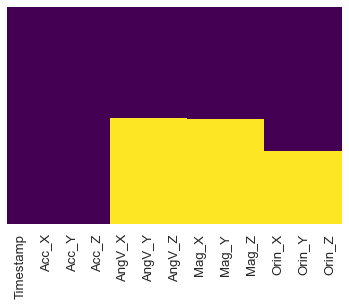

In [166]:
sns.heat map(running.isna(),cmap ='viridis', yticklabels = False, cbar =False)

<b> This is buttressed from the diagram above where the yellow patches are the location with missing data in the dataset</b>

* This has to be dealt with so the data can be evenly distributed
* Dropping the rolls that have missing values. it is important to know that it has to be dropped from the rolls because dropping from the column will remove entire column with a missing value which will reduce my data to acceleration alone as shown in the image above

In [167]:
# if I was dropping from column, I would have added the axis = 1 to the code
running.dropna(inplace = True)

In [168]:
# rechecking to be sure there are no missing values
running.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2398 entries, 0 to 2397
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2398 non-null   datetime64[ns]
 1   Acc_X      2398 non-null   float64       
 2   Acc_Y      2398 non-null   float64       
 3   Acc_Z      2398 non-null   float64       
 4   AngV_X     2398 non-null   float64       
 5   AngV_Y     2398 non-null   float64       
 6   AngV_Z     2398 non-null   float64       
 7   Mag_X      2398 non-null   float64       
 8   Mag_Y      2398 non-null   float64       
 9   Mag_Z      2398 non-null   float64       
 10  Orin_X     2398 non-null   float64       
 11  Orin_Y     2398 non-null   float64       
 12  Orin_Z     2398 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 262.3 KB


<b> From above, it can be seen that there are no more missing values in the dataframe though the numbers of data in the dataframe has reduced from 4674 previously held to 2398</b>

<b> This is shown graphically with an heatmap below </b>

<AxesSubplot:>

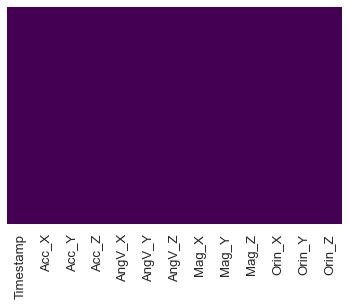

In [169]:
sns.heatmap(running.isna(),cmap ='viridis', yticklabels = False, cbar =False)

The yellow color which shows missing data in the previous image does not exist in this heatmap again.This signifies that all columns and rolls in the data set has a value

In [170]:
# Adding the activity tag to the dataset so as to b able to identify what activity the data represents after cleaning
running['Activity'] = 'Running'

In [171]:
# A pip into the dataset to know that the activity column has been filled with running
running.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-03 10:44:09.344  0.384048  3.808177  9.644720  0.582137 -0.039094   
1 2021-10-03 10:44:09.394 -0.176172  3.249902  9.384202  0.928946 -0.356277   
2 2021-10-03 10:44:09.444  0.100947  3.972833  6.660422  0.256861 -0.808456   
3 2021-10-03 10:44:09.494  1.707279  3.574578  6.316154  0.055587 -0.301606   
4 2021-10-03 10:44:09.544  1.754986  2.810370  6.446563  0.081854  0.399494   

     AngV_Z   Mag_X      Mag_Y      Mag_Z      Orin_X     Orin_Y    Orin_Z  \
0  0.371090 -7.0394 -30.548800 -34.367401  159.006025 -22.253460 -3.178970   
1  0.667656 -7.1492 -30.792799 -34.208797  157.706554 -24.202116 -3.841158   
2  1.056308 -7.5152 -31.073399 -33.867199  155.527150 -25.674720 -5.990561   
3  0.281601 -8.2106 -31.366199 -33.354801  152.687622 -25.860701 -8.942483   
4  0.089642 -8.9914 -31.671200 -32.781399  152.082645 -25.821107 -9.907714   

  Activity  
0  Running  
1  Running  
2  Running  
3  Running  
4  Running

### Now that the running dataset has been cleaned, the other actitivies are also worked to prepare them for joining together and modelling

## Loading the Sitting Activity and Processing it

In [172]:
sittingAcc = pd.read_excel('sitting_Acceleration.xlsx',sheet_name='Sheet1')
sittingAngV = pd.read_excel('sitting_AngularVelo.xlsx',sheet_name='Sheet1')
sittingMag = pd.read_excel('sitting_MagneticField.xlsx',sheet_name='Sheet1')
sittingOrin = pd.read_excel('sitting_Orientation.xlsx',sheet_name='Sheet1')

In [173]:
# Making a copy as previously done
sitAcc = sittingAcc.copy()
sitAngV = sittingAngV.copy()
sitMag = sittingMag.copy()
sitOrin = sittingOrin.copy()

### Checking to be sure dataset has been loaded

In [174]:
sitAcc.head()

Timestamp     Acc_X     Acc_Y     Acc_Z
0 2021-10-03 10:41:35.047  1.172334  6.908976  6.413812
1 2021-10-03 10:41:35.066  1.142423  6.980761  6.479614
2 2021-10-03 10:41:35.085  1.165155  6.840781  6.751349
3 2021-10-03 10:41:35.104  1.021436  6.806085  7.011120
4 2021-10-03 10:41:35.123  0.452842  6.637241  7.144071

In [175]:
sitAngV.head()

Timestamp    AngV_X    AngV_Y    AngV_Z
0 2021-10-03 10:41:35.042  0.055893 -0.001374  0.043676
1 2021-10-03 10:41:35.092  0.047646  0.002749  0.053907
2 2021-10-03 10:41:35.142  0.058183 -0.073607  0.106440
3 2021-10-03 10:41:35.192 -0.017256 -0.025045  0.011759
4 2021-10-03 10:41:35.242 -0.044286  0.058641 -0.116061

In [176]:
sitMag.tail()

Timestamp      Mag_X      Mag_Y    Mag_Z
2427 2021-10-03 10:43:36.400 -17.214199 -32.500801 -19.6054
2428 2021-10-03 10:43:36.450 -17.189800 -32.476398 -19.6786
2429 2021-10-03 10:43:36.500 -17.104399 -32.439800 -19.8372
2430 2021-10-03 10:43:36.550 -16.982399 -32.378799 -20.0324
2431 2021-10-03 10:43:36.600 -16.884800 -32.329998 -20.2642

In [177]:
sitOrin.tail()

Timestamp      Orin_X     Orin_Y    Orin_Z
3155 2021-10-03 10:43:34.830  113.693990 -47.081580 -8.297409
3156 2021-10-03 10:43:34.868  113.550256 -46.845662 -7.981317
3157 2021-10-03 10:43:34.906  113.198474 -46.205410 -7.061665
3158 2021-10-03 10:43:34.944  112.459953 -45.875488 -6.075803
3159 2021-10-03 10:43:34.982  112.667187 -46.009124 -5.894157

<b> The above shows that all the sitting sensor dataset has been loaded</b>

<b> Knowing fully well that Timestamp is not needed for all the data except for one since they are the same and remembering that it was the Timestamp for Acceleration that was left in the previous activity and in order to have a uniformity, same is done to the sitting activity below</b>

In [178]:
sitAngV= sitAngV.drop('Timestamp',axis=1)
sitMag = sitMag.drop('Timestamp',axis=1)
sitOrin = sitOrin.drop('Timestamp',axis=1)

In [179]:
# checking one to be sure Timestamp has been dropped
sitAngV.head()

AngV_X    AngV_Y    AngV_Z
0  0.055893 -0.001374  0.043676
1  0.047646  0.002749  0.053907
2  0.058183 -0.073607  0.106440
3 -0.017256 -0.025045  0.011759
4 -0.044286  0.058641 -0.116061

### Cmbinning all sitting dataset

In [180]:
# Care is taken to make sure the frame is formed the way the frame1 was formed so as not to distort the data
frame2 = [sitAcc, sitAngV, sitMag, sitOrin]

In [181]:
sitting = pd.concat(frame2, axis = 1)

In [182]:
# Checking to be sure that data has been concatinated
sitting.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-03 10:41:35.047  1.172334  6.908976  6.413812  0.055893 -0.001374   
1 2021-10-03 10:41:35.066  1.142423  6.980761  6.479614  0.047646  0.002749   
2 2021-10-03 10:41:35.085  1.165155  6.840781  6.751349  0.058183 -0.073607   
3 2021-10-03 10:41:35.104  1.021436  6.806085  7.011120 -0.017256 -0.025045   
4 2021-10-03 10:41:35.123  0.452842  6.637241  7.144071 -0.044286  0.058641   

     AngV_Z      Mag_X      Mag_Y      Mag_Z      Orin_X     Orin_Y     Orin_Z  
0  0.043676 -16.653000 -32.988800 -19.434599  122.668121 -44.388290 -10.420577  
1  0.053907 -16.653000 -32.976601 -19.532200  122.161758 -44.606388 -10.533792  
2  0.106440 -16.665199 -32.939999 -19.593199  121.854441 -44.721760 -10.415848  
3  0.011759 -16.738400 -32.891201 -19.654200  121.591233 -44.746284 -10.391092  
4 -0.116061 -16.823799 -32.854599 -19.617599  121.192213 -44.766159 -10.648008

In [183]:
sitting.tail()

Timestamp  Acc_X  Acc_Y  Acc_Z  AngV_X  AngV_Y  AngV_Z  Mag_X  Mag_Y  \
3155       NaT    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   
3156       NaT    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   
3157       NaT    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   
3158       NaT    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   
3159       NaT    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   

      Mag_Z      Orin_X     Orin_Y    Orin_Z  
3155    NaN  113.693990 -47.081580 -8.297409  
3156    NaN  113.550256 -46.845662 -7.981317  
3157    NaN  113.198474 -46.205410 -7.061665  
3158    NaN  112.459953 -45.875488 -6.075803  
3159    NaN  112.667187 -46.009124 -5.894157

<b>From above, it can be seen that the data have all been added to a single sheet at the column level but we can also see that there are missing values. This is graphically represented with the heatmap below</b>

<AxesSubplot:>

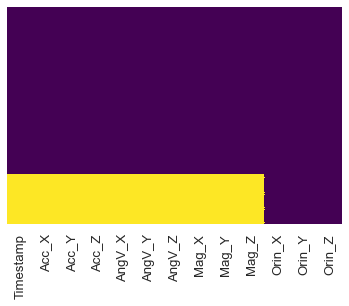

In [184]:
sns.heatmap(sitting.isna(),cmap ='viridis', yticklabels = False, cbar =False)

The Yellow color shows where data are missing from the sitting data set. This is also sorted the way the running was sorted

In [185]:
sitting.dropna(inplace = True)

In [186]:
sitting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2431 non-null   datetime64[ns]
 1   Acc_X      2431 non-null   float64       
 2   Acc_Y      2431 non-null   float64       
 3   Acc_Z      2431 non-null   float64       
 4   AngV_X     2431 non-null   float64       
 5   AngV_Y     2431 non-null   float64       
 6   AngV_Z     2431 non-null   float64       
 7   Mag_X      2431 non-null   float64       
 8   Mag_Y      2431 non-null   float64       
 9   Mag_Z      2431 non-null   float64       
 10  Orin_X     2431 non-null   float64       
 11  Orin_Y     2431 non-null   float64       
 12  Orin_Z     2431 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 265.9 KB


<b> From above it can be seen that all the data rolls and columns of the data set are now have values and the total number of entries are now 2431 compared to the 3160 entries previously held.

This is shown with a new heatmap below</b>

<AxesSubplot:>

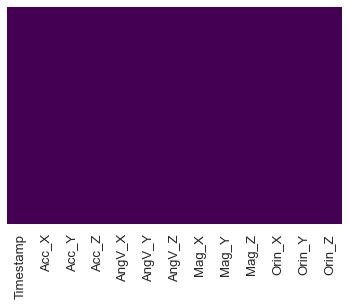

In [187]:
sns.heatmap(sitting.isna(),cmap ='viridis', yticklabels = False, cbar =False)

In [188]:
# Adding the activity tag to the dataset so as to b able to identify what activity the data represents after cleaning
sitting['Activity'] = 'Sitting'

In [189]:
# confirming the activity column has been added
sitting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2431 non-null   datetime64[ns]
 1   Acc_X      2431 non-null   float64       
 2   Acc_Y      2431 non-null   float64       
 3   Acc_Z      2431 non-null   float64       
 4   AngV_X     2431 non-null   float64       
 5   AngV_Y     2431 non-null   float64       
 6   AngV_Z     2431 non-null   float64       
 7   Mag_X      2431 non-null   float64       
 8   Mag_Y      2431 non-null   float64       
 9   Mag_Z      2431 non-null   float64       
 10  Orin_X     2431 non-null   float64       
 11  Orin_Y     2431 non-null   float64       
 12  Orin_Z     2431 non-null   float64       
 13  Activity   2431 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 284.9+ KB


<b> This is shown above with an increase in the number of column and activity added to the list of column. This is further shown by having a pip into the sitting dataset</b>

In [190]:
sitting.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-03 10:41:35.047  1.172334  6.908976  6.413812  0.055893 -0.001374   
1 2021-10-03 10:41:35.066  1.142423  6.980761  6.479614  0.047646  0.002749   
2 2021-10-03 10:41:35.085  1.165155  6.840781  6.751349  0.058183 -0.073607   
3 2021-10-03 10:41:35.104  1.021436  6.806085  7.011120 -0.017256 -0.025045   
4 2021-10-03 10:41:35.123  0.452842  6.637241  7.144071 -0.044286  0.058641   

     AngV_Z      Mag_X      Mag_Y      Mag_Z      Orin_X     Orin_Y  \
0  0.043676 -16.653000 -32.988800 -19.434599  122.668121 -44.388290   
1  0.053907 -16.653000 -32.976601 -19.532200  122.161758 -44.606388   
2  0.106440 -16.665199 -32.939999 -19.593199  121.854441 -44.721760   
3  0.011759 -16.738400 -32.891201 -19.654200  121.591233 -44.746284   
4 -0.116061 -16.823799 -32.854599 -19.617599  121.192213 -44.766159   

      Orin_Z Activity  
0 -10.420577  Sitting  
1 -10.533792  Sitting  
2 -10.415848  Sitting  
3 -10.391092  Sitting  
4 -10.648008  Sitting

## Loading the Sleeping Sensor Dataset

In [191]:
sleepingAcc = pd.read_excel('Sleeping_Acceleration.xlsx',sheet_name='Sheet1')
sleepingAngV = pd.read_excel('Sleeping_AngularVelo.xlsx',sheet_name='Sheet1')
sleepingMag = pd.read_excel('Sleeping_MagneticField.xlsx',sheet_name='Sheet1')
sleepingOrin = pd.read_excel('Sleeping_Orientation.xlsx',sheet_name='Sheet1')

In [192]:
# Making a copy as previously done
sleepAcc = sleepingAcc.copy()
sleepAngV = sleepingAngV.copy()
sleepMag = sleepingMag.copy()
sleepOrin = sleepingOrin.copy()

In [193]:
# dropping the Timestamp relative to previously done
sleepAngV= sleepAngV.drop('Timestamp',axis=1)
sleepMag = sleepMag.drop('Timestamp',axis=1)
sleepOrin = sleepOrin.drop('Timestamp',axis=1)

In [194]:
# Combining all sheets of the dataset
frame3 = [sleepAcc, sleepAngV, sleepMag, sleepOrin]

In [195]:
# concatinating the data set
sleeping = pd.concat(frame3, axis = 1)

In [196]:
# checking to make sure the dataset is conbined
sleeping.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-03 10:47:00.060  0.740130  9.427571 -2.401197 -0.206619  0.020005   
1 2021-10-03 10:47:00.079  0.740130  9.423983 -2.236093 -0.106746 -0.222959   
2 2021-10-03 10:47:00.098  0.717398  9.349805 -2.173879 -0.016187 -0.202343   
3 2021-10-03 10:47:00.117  0.645613  9.446714 -2.240878 -0.096056 -0.032833   
4 2021-10-03 10:47:00.136  0.736541  9.416804 -2.413162 -0.182491 -0.035276   

     AngV_Z      Mag_X      Mag_Y   Mag_Z      Orin_X     Orin_Y      Orin_Z  
0 -0.088573 -21.728199 -42.211998 -1.1102 -106.483974 -74.114321 -161.045820  
1 -0.057267 -21.667200 -42.236401 -1.2566 -106.695485 -74.588562 -161.237516  
2 -0.076050 -21.545200 -42.260799 -1.3664 -106.840811 -74.876645 -161.872533  
3 -0.113159 -21.472000 -42.321800 -1.4640 -107.310557 -74.959359 -162.867090  
4 -0.125987 -21.350000 -42.395000 -1.5982 -108.023444 -75.089959 -163.791406

In [197]:
sleeping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  3670 non-null   datetime64[ns]
 1   Acc_X      3670 non-null   float64       
 2   Acc_Y      3670 non-null   float64       
 3   Acc_Z      3670 non-null   float64       
 4   AngV_X     2420 non-null   float64       
 5   AngV_Y     2420 non-null   float64       
 6   AngV_Z     2420 non-null   float64       
 7   Mag_X      2428 non-null   float64       
 8   Mag_Y      2428 non-null   float64       
 9   Mag_Z      2428 non-null   float64       
 10  Orin_X     3142 non-null   float64       
 11  Orin_Y     3142 non-null   float64       
 12  Orin_Z     3142 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 372.9 KB


<b> The above shows that the dataset has missing values and this is shown in the heatmap below</b>

<AxesSubplot:>

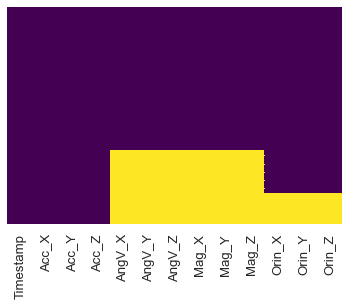

In [198]:
sns.heatmap(sleeping.isna(),cmap ='viridis', yticklabels = False, cbar =False)

In [199]:
# dropping rolls without a complete data as done previously
sleeping.dropna(inplace =True)

In [200]:
#Confirming missing data has been dropped
sleeping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420 entries, 0 to 2419
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2420 non-null   datetime64[ns]
 1   Acc_X      2420 non-null   float64       
 2   Acc_Y      2420 non-null   float64       
 3   Acc_Z      2420 non-null   float64       
 4   AngV_X     2420 non-null   float64       
 5   AngV_Y     2420 non-null   float64       
 6   AngV_Z     2420 non-null   float64       
 7   Mag_X      2420 non-null   float64       
 8   Mag_Y      2420 non-null   float64       
 9   Mag_Z      2420 non-null   float64       
 10  Orin_X     2420 non-null   float64       
 11  Orin_Y     2420 non-null   float64       
 12  Orin_Z     2420 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 264.7 KB


<b> The above information table shows that there are no missing values in the dataset and the data has reduced from a total of 3670 t0 2420. below is an heatmap to give a pictorial representation</b>

<AxesSubplot:>

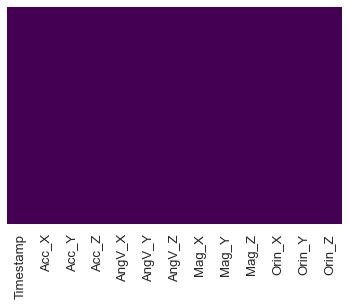

In [201]:
sns.heatmap(sleeping.isna(),cmap ='viridis', yticklabels = False, cbar =False)

In [202]:
# Adding the Activity column to be able to identify the activiy
sleeping['Activity'] = 'Sleeping'

In [203]:
sleeping.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-03 10:47:00.060  0.740130  9.427571 -2.401197 -0.206619  0.020005   
1 2021-10-03 10:47:00.079  0.740130  9.423983 -2.236093 -0.106746 -0.222959   
2 2021-10-03 10:47:00.098  0.717398  9.349805 -2.173879 -0.016187 -0.202343   
3 2021-10-03 10:47:00.117  0.645613  9.446714 -2.240878 -0.096056 -0.032833   
4 2021-10-03 10:47:00.136  0.736541  9.416804 -2.413162 -0.182491 -0.035276   

     AngV_Z      Mag_X      Mag_Y   Mag_Z      Orin_X     Orin_Y      Orin_Z  \
0 -0.088573 -21.728199 -42.211998 -1.1102 -106.483974 -74.114321 -161.045820   
1 -0.057267 -21.667200 -42.236401 -1.2566 -106.695485 -74.588562 -161.237516   
2 -0.076050 -21.545200 -42.260799 -1.3664 -106.840811 -74.876645 -161.872533   
3 -0.113159 -21.472000 -42.321800 -1.4640 -107.310557 -74.959359 -162.867090   
4 -0.125987 -21.350000 -42.395000 -1.5982 -108.023444 -75.089959 -163.791406   

   Activity  
0  Sleeping  
1  Sleeping  
2  Sleeping  
3  Sleeping  
4  Sleeping

<AxesSubplot:>

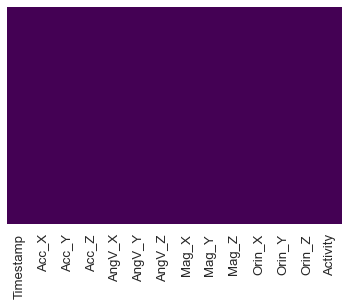

In [204]:
sns.heatmap(sleeping.isna(),cmap ='viridis', yticklabels = False, cbar =False)

<b> This shows that the activity column has been created and populated with sleeping</b>

<b> Since the modelling is designed such that it can be able to predicted with agreed accuracy what activity is been done by human, working on the dataset ( running,sitting and sleeping) separately will not make that possible. In Leiu of the above, all the activity data are all combined together to form a single dataset </b>

In [205]:
frame4 = [running, sitting, sleeping]

In [206]:
masterSensorData = pd.concat(frame4)

### Confirming that all activities have been combined into a single dataset

In [207]:
masterSensorData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 2419
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  7249 non-null   datetime64[ns]
 1   Acc_X      7249 non-null   float64       
 2   Acc_Y      7249 non-null   float64       
 3   Acc_Z      7249 non-null   float64       
 4   AngV_X     7249 non-null   float64       
 5   AngV_Y     7249 non-null   float64       
 6   AngV_Z     7249 non-null   float64       
 7   Mag_X      7249 non-null   float64       
 8   Mag_Y      7249 non-null   float64       
 9   Mag_Z      7249 non-null   float64       
 10  Orin_X     7249 non-null   float64       
 11  Orin_Y     7249 non-null   float64       
 12  Orin_Z     7249 non-null   float64       
 13  Activity   7249 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 849.5+ KB


<b> The above shows that I currently have a single table which contains a total number of 7249 rolls and 13 columns

In [208]:
# Taking a pip at the new table
masterSensorData.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-03 10:44:09.344  0.384048  3.808177  9.644720  0.582137 -0.039094   
1 2021-10-03 10:44:09.394 -0.176172  3.249902  9.384202  0.928946 -0.356277   
2 2021-10-03 10:44:09.444  0.100947  3.972833  6.660422  0.256861 -0.808456   
3 2021-10-03 10:44:09.494  1.707279  3.574578  6.316154  0.055587 -0.301606   
4 2021-10-03 10:44:09.544  1.754986  2.810370  6.446563  0.081854  0.399494   

     AngV_Z   Mag_X      Mag_Y      Mag_Z      Orin_X     Orin_Y    Orin_Z  \
0  0.371090 -7.0394 -30.548800 -34.367401  159.006025 -22.253460 -3.178970   
1  0.667656 -7.1492 -30.792799 -34.208797  157.706554 -24.202116 -3.841158   
2  1.056308 -7.5152 -31.073399 -33.867199  155.527150 -25.674720 -5.990561   
3  0.281601 -8.2106 -31.366199 -33.354801  152.687622 -25.860701 -8.942483   
4  0.089642 -8.9914 -31.671200 -32.781399  152.082645 -25.821107 -9.907714   

  Activity  
0  Running  
1  Running  
2  Running  
3  Running  
4  Running

In [209]:
masterSensorData.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
2415 2021-10-03 10:48:19.759  1.409073  9.525678  1.726122  0.012675   
2416 2021-10-03 10:48:19.809  1.395464  9.585498  1.564906  0.211200   
2417 2021-10-03 10:48:19.859  1.409223  9.597611  1.858326 -0.399647   
2418 2021-10-03 10:48:19.909  1.394567  9.489336  1.979463  0.548083   
2419 2021-10-03 10:48:19.959  1.542025  9.442975  1.541277  0.199594   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
2415  0.134997 -0.032375 -18.421999 -41.541000 -12.248799  72.681751   
2416  0.196235  0.049326 -18.299999 -41.711800 -11.895000  77.342842   
2417  1.620120  0.169510 -18.165800 -41.919201 -11.553400  77.240451   
2418  1.468477  0.102775 -18.092600 -42.077801 -11.175200  76.650323   
2419 -0.392011  0.229068 -18.007200 -42.199799 -10.821400  77.172805   

         Orin_Y     Orin_Z  Activity  
2415 -82.801072   8.709580  Sleeping  
2416 -83.255232  14.218837  Sleeping  
2417 -83.354652  14.930131  Sleeping  
2418 -83.610238  14.804495  Sleeping  
2419 -84.187286  15.703242  Sleeping

<b> From above, it can be noticed that though the total number of entries in my masterSensorData is 7249, the tail command which shows the ending of the dataset is showing 2419 as the total number. 2419 stands for the total number of the last activity log added to the mastSensorData. This then means that the masterSensorData has to be renumbered appropriately</b>

### Resetting the Index

In [210]:
masterSensorData = masterSensorData.reset_index()

In [211]:
# Confirming if this has been done
masterSensorData.tail()

index               Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
7244   2415 2021-10-03 10:48:19.759  1.409073  9.525678  1.726122  0.012675   
7245   2416 2021-10-03 10:48:19.809  1.395464  9.585498  1.564906  0.211200   
7246   2417 2021-10-03 10:48:19.859  1.409223  9.597611  1.858326 -0.399647   
7247   2418 2021-10-03 10:48:19.909  1.394567  9.489336  1.979463  0.548083   
7248   2419 2021-10-03 10:48:19.959  1.542025  9.442975  1.541277  0.199594   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
7244  0.134997 -0.032375 -18.421999 -41.541000 -12.248799  72.681751   
7245  0.196235  0.049326 -18.299999 -41.711800 -11.895000  77.342842   
7246  1.620120  0.169510 -18.165800 -41.919201 -11.553400  77.240451   
7247  1.468477  0.102775 -18.092600 -42.077801 -11.175200  76.650323   
7248 -0.392011  0.229068 -18.007200 -42.199799 -10.821400  77.172805   

         Orin_Y     Orin_Z  Activity  
7244 -82.801072   8.709580  Sleeping  
7245 -83.255232  14.218837  Sleeping  
7246 -83.354652  14.930131  Sleeping  
7247 -83.610238  14.804495  Sleeping  
7248 -84.187286  15.703242  Sleeping

<b> This shows that although the numbering has been corrected but there are two numbering in the dataset. the previous index and the current one. The previous index will have to be deleted. This is done below</b>

In [212]:
masterSensorData =masterSensorData.drop('index', axis = 1)

In [213]:
# confirming if this has been done
masterSensorData.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
7244 2021-10-03 10:48:19.759  1.409073  9.525678  1.726122  0.012675   
7245 2021-10-03 10:48:19.809  1.395464  9.585498  1.564906  0.211200   
7246 2021-10-03 10:48:19.859  1.409223  9.597611  1.858326 -0.399647   
7247 2021-10-03 10:48:19.909  1.394567  9.489336  1.979463  0.548083   
7248 2021-10-03 10:48:19.959  1.542025  9.442975  1.541277  0.199594   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
7244  0.134997 -0.032375 -18.421999 -41.541000 -12.248799  72.681751   
7245  0.196235  0.049326 -18.299999 -41.711800 -11.895000  77.342842   
7246  1.620120  0.169510 -18.165800 -41.919201 -11.553400  77.240451   
7247  1.468477  0.102775 -18.092600 -42.077801 -11.175200  76.650323   
7248 -0.392011  0.229068 -18.007200 -42.199799 -10.821400  77.172805   

         Orin_Y     Orin_Z  Activity  
7244 -82.801072   8.709580  Sleeping  
7245 -83.255232  14.218837  Sleeping  
7246 -83.354652  14.930131  Sleeping  
7247 -83.610238  14.804495  Sleeping  
7248 -84.187286  15.703242  Sleeping

<b> The above shows that there is now a single index in the dataset. it can also be noted that the dataset is a continous data set considering values are not constant but varies</b>

In [214]:
# Determing the unique values in the combined dataset to be assured that all the actiivities are properly labelled in the dataset
masterSensorData['Activity'].unique()

array(['Running', 'Sitting', 'Sleeping'], dtype=object)

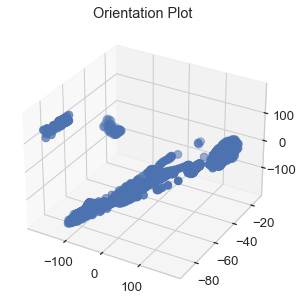

In [215]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
xline = masterSensorData['Orin_X']
yline = masterSensorData['Orin_Y']
zline = masterSensorData['Orin_Z']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Orientation Plot')
plt.show()

<AxesSubplot:>

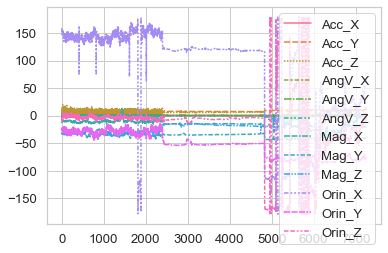

In [216]:
sns.lineplot(data = masterSensorData)

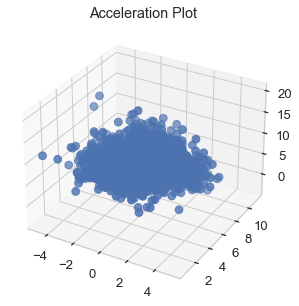

In [217]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
xline = masterSensorData['Acc_X']
yline = masterSensorData['Acc_Y']
zline = masterSensorData['Acc_Z']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Acceleration Plot')
plt.show()

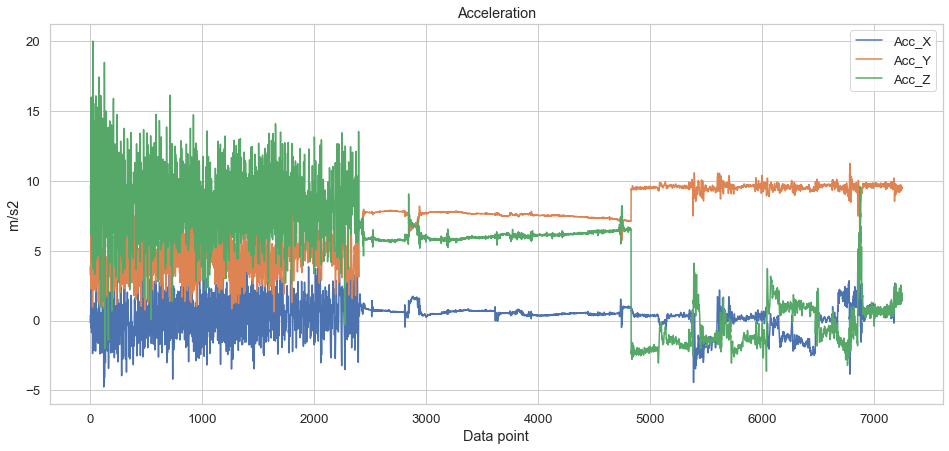

In [218]:
title='Acceleration'
ylabel='m/s2'
xlabel='Data point'

ax5 = masterSensorData['Acc_X'].plot(figsize=(16,7),legend=True)
ax5 = masterSensorData['Acc_Y'].plot(figsize=(16,7),legend=True)
ax5 = masterSensorData['Acc_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

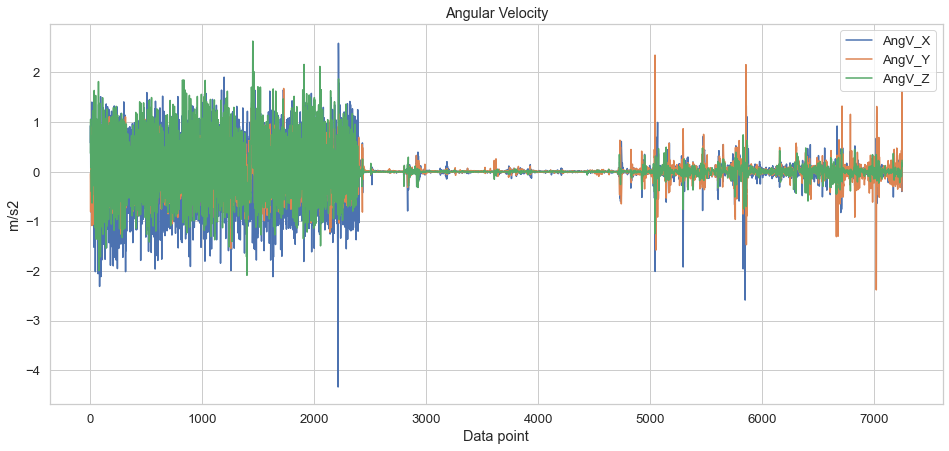

In [219]:
title='Angular Velocity'
ylabel='m/s2'
xlabel='Data point'

ax5 = masterSensorData['AngV_X'].plot(figsize=(16,7),legend=True)
ax5 = masterSensorData['AngV_Y'].plot(figsize=(16,7),legend=True)
ax5 = masterSensorData['AngV_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

## A brief statistical discription of the data

In [220]:
masterSensorData.describe().T

count       mean        std         min        25%         50%  \
Acc_X   7249.0   0.317268   1.076547   -4.765007   0.013759    0.454786   
Acc_Y   7249.0   7.266283   2.183390    0.617946   5.755038    7.619944   
Acc_Z   7249.0   4.691542   4.077727   -3.629463   0.795165    5.942725   
AngV_X  7249.0   0.000117   0.450986   -4.340222  -0.047188    0.000153   
AngV_Y  7249.0  -0.000414   0.267595   -2.382915  -0.046577    0.001222   
AngV_Z  7249.0  -0.000624   0.406184   -2.088945  -0.062459   -0.000458   
Mag_X   7249.0 -15.792219   6.830744  -41.919201 -19.056400  -14.847400   
Mag_Y   7249.0 -36.145365   4.575582  -46.030598 -40.808998  -34.928600   
Mag_Z   7249.0 -21.311134   9.340465  -42.639000 -30.622000  -18.970999   
Orin_X  7249.0  77.303016  90.534085 -179.088475  18.964532  119.993747   
Orin_Y  7249.0 -53.351324  21.507665  -89.724466 -76.981840  -51.935386   
Orin_Z  7249.0 -19.780700  58.531907 -179.515649 -14.272282   -5.610149   

               75%         max  
Acc_X     0.720240    5.092674  
Acc_Y     9.449107   11.251052  
Acc_Z     6.981808   20.023888  
AngV_X    0.071316    2.587396  
AngV_Y    0.057114    2.348555  
AngV_Z    0.028710    2.631683  
Mag_X   -11.407000   13.273600  
Mag_Y   -33.488998  -15.774600  
Mag_Z   -15.420799   -0.012200  
Orin_X  140.218606  179.762396  
Orin_Y  -31.717192  -14.392879  
Orin_Z   -3.315045  179.726552

<b> * The above shows a statistical analysis of the combined data. from it, the following information can be derived
1. All columns have equal entires.
2. Mean varies about the dataframe but orientation has the highest value which is a function of the fact that all values in orientation are majorly positive meaning the phone was upright when sensor datas were collected while magnetic field has the lowest mean value.
3. The mean and median (50%) value are not close</b>

## Visualisation of Data to give a clearer idea of the combined data

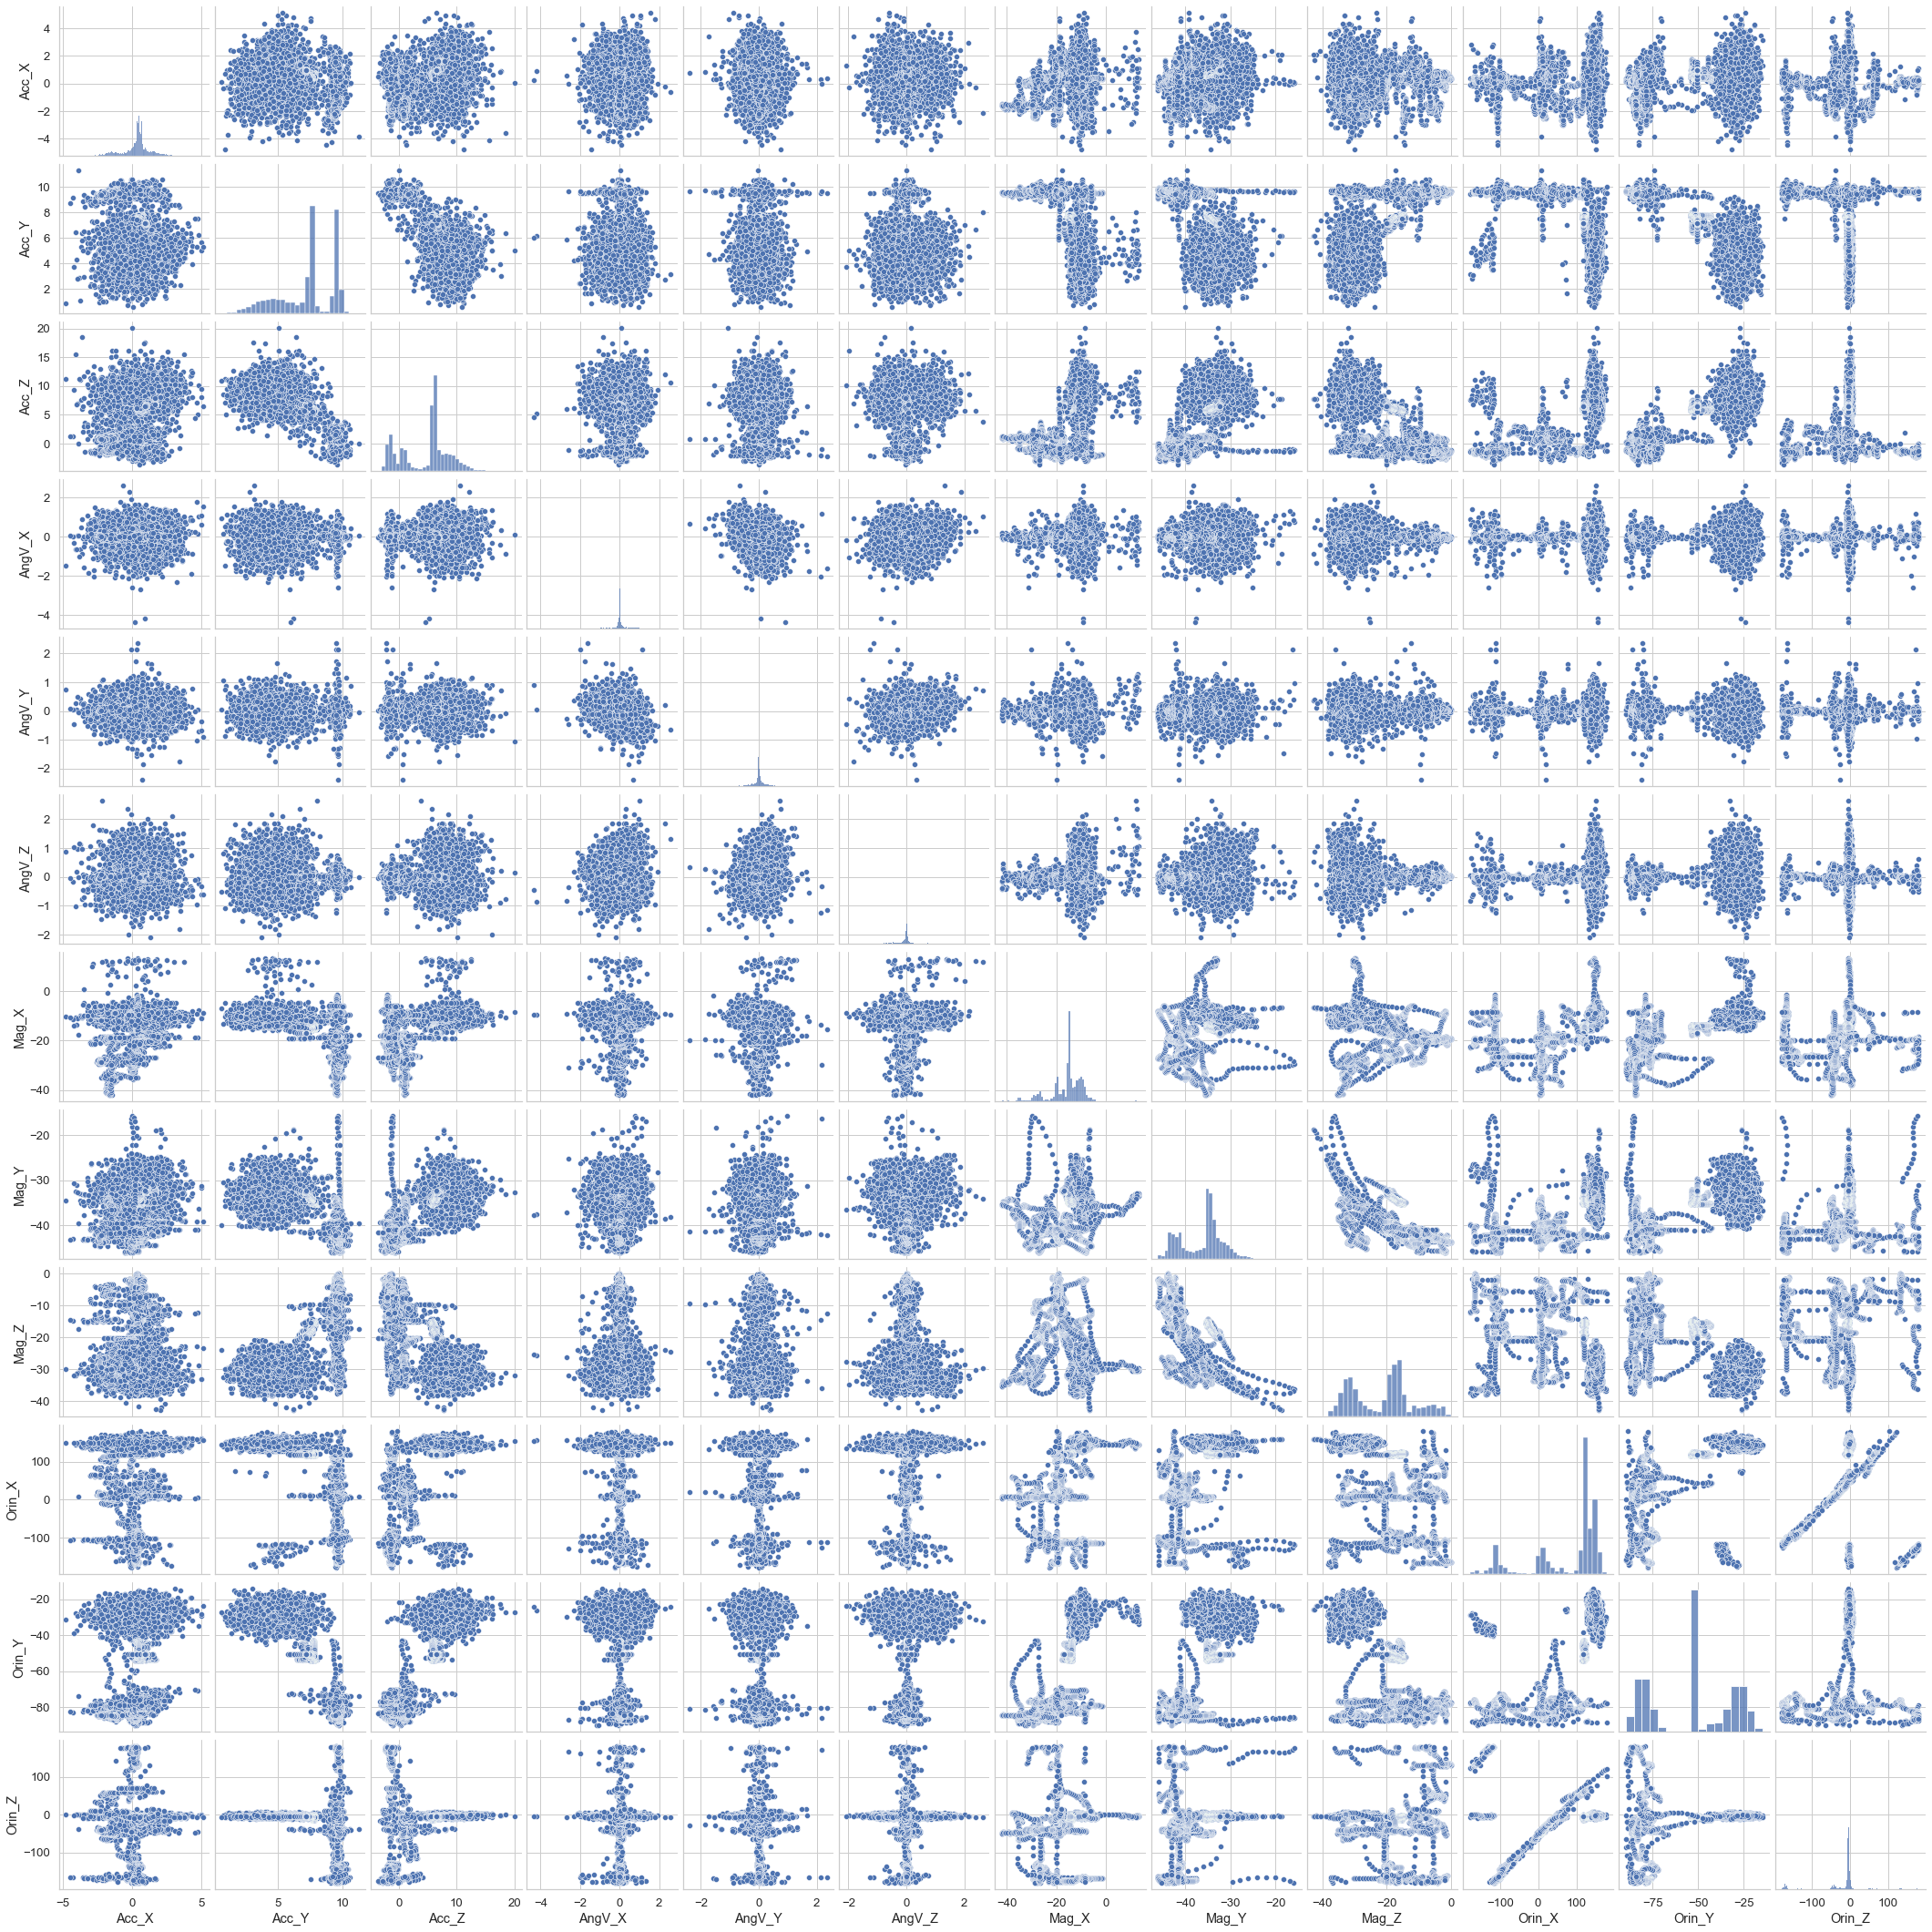

In [221]:
sns.pairplot(masterSensorData)

#### The above image shows a plot of every single numerical columns in the dataset and their relationship. This is done by passing in the whole dataset

In [222]:
# Making a correlation matrix to see how related the data are
masterSensorData.corr()

Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y    AngV_Z     Mag_X  \
Acc_X   1.000000 -0.088358  0.169841  0.021704  0.010467  0.028683  0.210936   
Acc_Y  -0.088358  1.000000 -0.813301  0.001728  0.014662 -0.002931 -0.663982   
Acc_Z   0.169841 -0.813301  1.000000  0.003938 -0.020128 -0.009800  0.639816   
AngV_X  0.021704  0.001728  0.003938  1.000000 -0.298230  0.118667  0.010202   
AngV_Y  0.010467  0.014662 -0.020128 -0.298230  1.000000  0.301195 -0.010850   
AngV_Z  0.028683 -0.002931 -0.009800  0.118667  0.301195  1.000000  0.036116   
Mag_X   0.210936 -0.663982  0.639816  0.010202 -0.010850  0.036116  1.000000   
Mag_Y   0.151955 -0.680916  0.768878  0.018899  0.000907  0.002758  0.478376   
Mag_Z   0.074853  0.643033 -0.557952 -0.013826  0.030456  0.001352 -0.224233   
Orin_X  0.119832 -0.643150  0.767480 -0.010003 -0.005576  0.014398  0.549152   
Orin_Y  0.171626 -0.884798  0.880229 -0.005417 -0.023289  0.002337  0.744892   
Orin_Z  0.051867 -0.282257  0.346721  0.004101  0.009508  0.008509  0.233918   

           Mag_Y     Mag_Z    Orin_X    Orin_Y    Orin_Z  
Acc_X   0.151955  0.074853  0.119832  0.171626  0.051867  
Acc_Y  -0.680916  0.643033 -0.643150 -0.884798 -0.282257  
Acc_Z   0.768878 -0.557952  0.767480  0.880229  0.346721  
AngV_X  0.018899 -0.013826 -0.010003 -0.005417  0.004101  
AngV_Y  0.000907  0.030456 -0.005576 -0.023289  0.009508  
AngV_Z  0.002758  0.001352  0.014398  0.002337  0.008509  
Mag_X   0.478376 -0.224233  0.549152  0.744892  0.233918  
Mag_Y   1.000000 -0.649691  0.657480  0.764361  0.338655  
Mag_Z  -0.649691  1.000000 -0.414537 -0.629727 -0.116756  
Orin_X  0.657480 -0.414537  1.000000  0.758136  0.470813  
Orin_Y  0.764361 -0.629727  0.758136  1.000000  0.333360  
Orin_Z  0.338655 -0.116756  0.470813  0.333360  1.000000

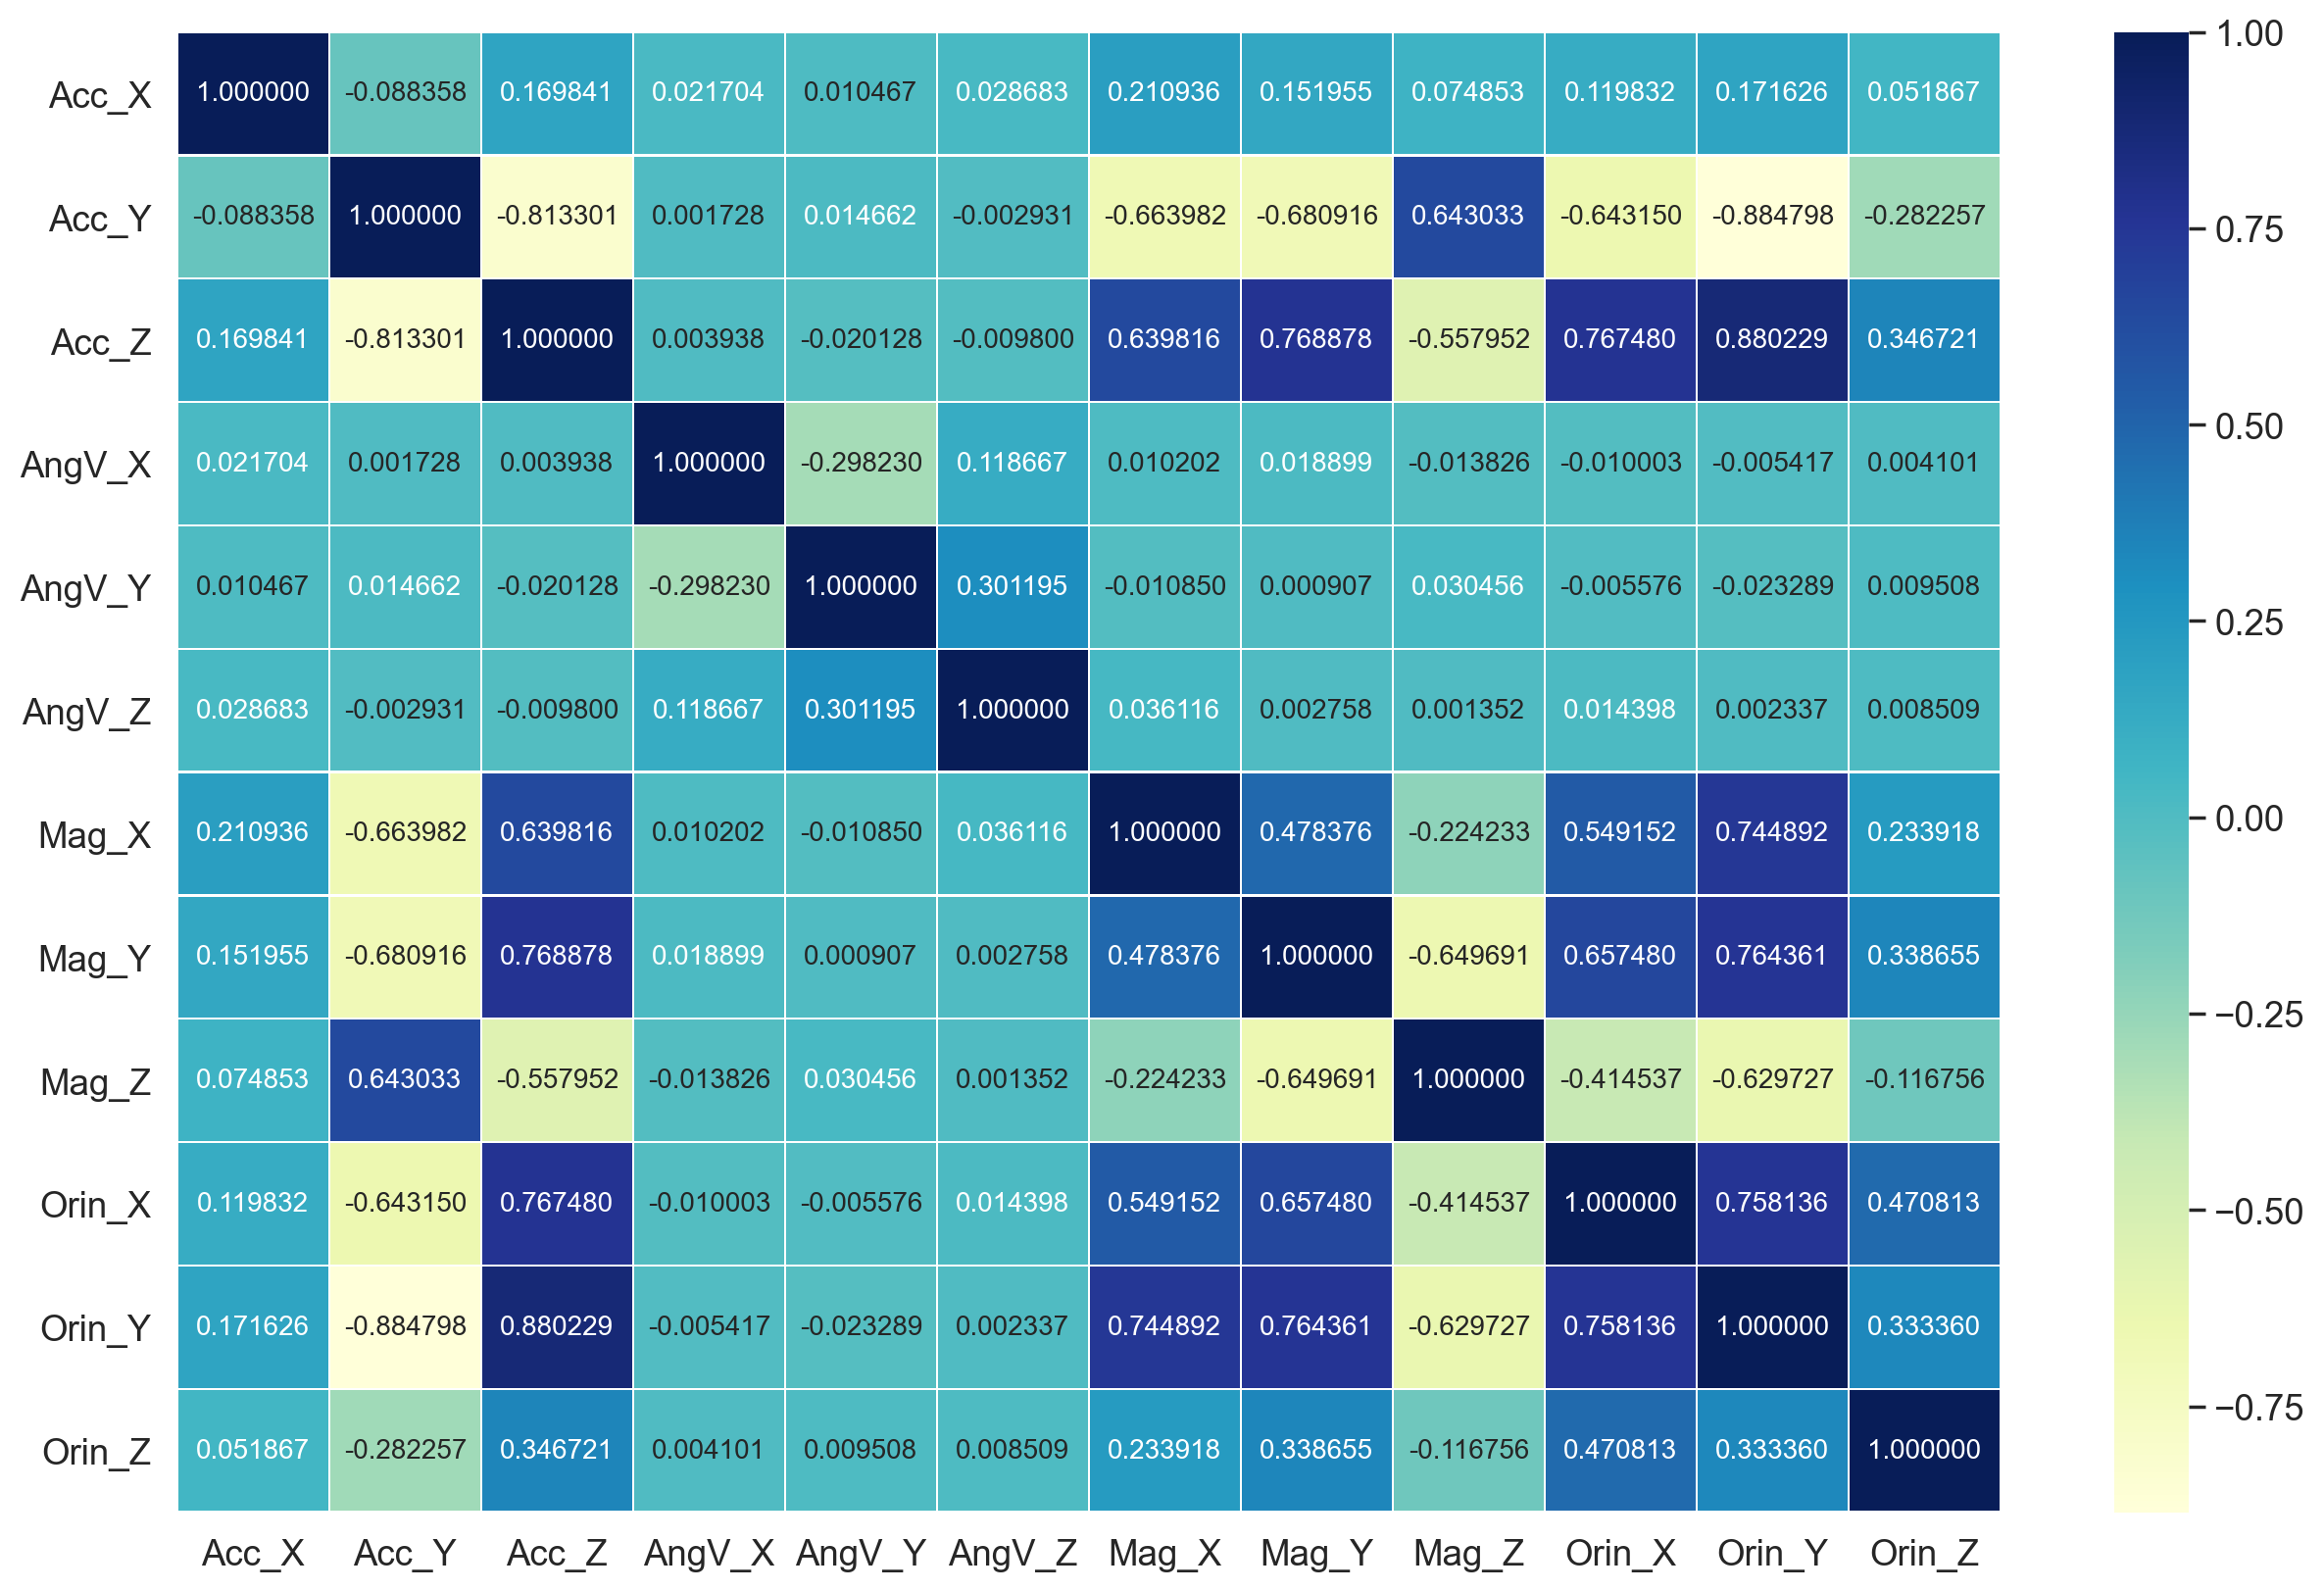

In [223]:
# The above will take time to understand. So it is converted to image to have an pictorial ideal of the relationship of the datas
corr_matrix = masterSensorData.corr()
fig, ax = plt.subplots(figsize =(15,10), dpi = 200)
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = '2f', cmap ='YlGnBu');

#### The darker the shade of the blue, the more related they are whereas all the data which are white in color do not really have anything in relations to themselve

<AxesSubplot:xlabel='Activity', ylabel='count'>

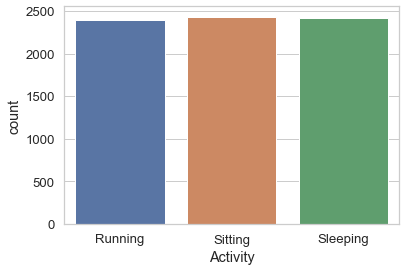

In [224]:
sns.countplot(x='Activity', data = masterSensorData)

<b> The above image helps show that the entries for each activity in the dataset are very close therefore should be adequate in modelling</b>

## Exporting files to csv

In [225]:
masterSensorData.to_csv('masterSensorData.csv')

## MODELLING
Now that the data has been cleaned and we can see that we have almost an equal amount of data, decision on the model to be used will have to be decided and the fear of not having equal and enough data to train the model is not founded.

in modelling, there are some specific steps that needs to be followed namely;
* Create X and y from the masterSensorData where X is all features except the category to be predicted and y is the category being predicted
* Split the data into train set and test set
* Scale the data if necessary (KNN and Nueral Network)
* fit the X-train data ( Train the model)
* Predict how effective the model is (X_test)
* Evaluate the model to see its accuracy

<b>Finally try if other models or other instances of the model will perform better

<b>compare the models

In [226]:
# splitting data into X and y using a library in sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Activity_class = le.fit_transform(masterSensorData['Activity'])

In [227]:
#To confirm that the Activity_class has the same number sof rolls as the masterSensorData
Activity_class.shape

(7249,)

In [228]:
Activity_class # This shows that there are three activities in the column labelled 0,1 and 2

array([0, 0, 0, ..., 2, 2, 2])

### Now that the activity has been converted into numerical data, the data can now be grouped into X and y. where X are all other features and y is the prediction category using the feature

In [229]:
X = masterSensorData.iloc[:, 1:-1] # This is simply dropping the timestamp because it is not a function necessary in predicting the activity and also removing the Activity column since they have already been changed by the encoder
y = Activity_class

In [230]:
# checking X
X

Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
0     0.384048  3.808177  9.644720  0.582137 -0.039094  0.371090  -7.039400   
1    -0.176172  3.249902  9.384202  0.928946 -0.356277  0.667656  -7.149200   
2     0.100947  3.972833  6.660422  0.256861 -0.808456  1.056308  -7.515200   
3     1.707279  3.574578  6.316154  0.055587 -0.301606  0.281601  -8.210600   
4     1.754986  2.810370  6.446563  0.081854  0.399494  0.089642  -8.991400   
...        ...       ...       ...       ...       ...       ...        ...   
7244  1.409073  9.525678  1.726122  0.012675  0.134997 -0.032375 -18.421999   
7245  1.395464  9.585498  1.564906  0.211200  0.196235  0.049326 -18.299999   
7246  1.409223  9.597611  1.858326 -0.399647  1.620120  0.169510 -18.165800   
7247  1.394567  9.489336  1.979463  0.548083  1.468477  0.102775 -18.092600   
7248  1.542025  9.442975  1.541277  0.199594 -0.392011  0.229068 -18.007200   

          Mag_Y      Mag_Z      Orin_X     Orin_Y     Orin_Z  
0    -30.548800 -34.367401  159.006025 -22.253460  -3.178970  
1    -30.792799 -34.208797  157.706554 -24.202116  -3.841158  
2    -31.073399 -33.867199  155.527150 -25.674720  -5.990561  
3    -31.366199 -33.354801  152.687622 -25.860701  -8.942483  
4    -31.671200 -32.781399  152.082645 -25.821107  -9.907714  
...         ...        ...         ...        ...        ...  
7244 -41.541000 -12.248799   72.681751 -82.801072   8.709580  
7245 -41.711800 -11.895000   77.342842 -83.255232  14.218837  
7246 -41.919201 -11.553400   77.240451 -83.354652  14.930131  
7247 -42.077801 -11.175200   76.650323 -83.610238  14.804495  
7248 -42.199799 -10.821400   77.172805 -84.187286  15.703242  

[7249 rows x 12 columns]

In [231]:
# checking y
y

array([0, 0, 0, ..., 2, 2, 2])

#### Splitting Data into train and test set

In [232]:
# Using library inside sklearn to do it
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 101)

### Scaling the Data for ...

In [233]:
# use sklearn library for that too
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Different Modelling to be used
<b> For each model stated below, fit, prediction and evaluation will be done</b>
* Logistic Regression
* Random Forest
* Neural Network
* Convolutional Neural Network

## Logistic Regression

In [234]:
# importing the Logistic Regression Library into the notebook
from sklearn.linear_model import LogisticRegression
lgR = LogisticRegression()

In [235]:
# Training the model (fit) with X_train and y_train
lgR.fit(X_train, y_train)

LogisticRegression()

## Prediction
<b> Now that the model has been trained, we then use X_test to do the prediction

In [236]:
pred = lgR.predict(X_test)

In [237]:
# Checking the predicted Value
pred

array([2, 2, 1, ..., 1, 2, 1])

### Evaluating the Model
for a classification project, there are different types of evaluation method used.
* confusion matric
* precision
* Recall
* f1- Score

The last three can be reported inside the classification report. So for the sake of evaluating the model both Classification Report and confusion metrix will be used.

In [238]:
# importing metrics for evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))
print('\n')
print (confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      1.00      1.00       514
           2       1.00      1.00      1.00       458

    accuracy                           1.00      1450
   macro avg       1.00      1.00      1.00      1450
weighted avg       1.00      1.00      1.00      1450



[[478   0   0]
 [  0 514   0]
 [  0   0 458]]


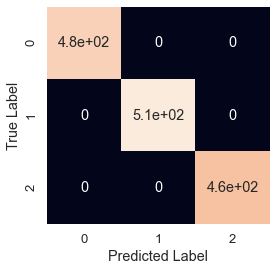

In [239]:
sns.set(font_scale = 1.2)
def plot_conf_mat(y_test, pred):
    fig.ax = plt.subplots(figsize = (4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, pred), annot = True, cbar = False)
    plt.xlabel("Predicted Label") # Predictions go on the x-axis
    plt.ylabel('True Label') #True labels go on the y-axis
    
plot_conf_mat(y_test, pred)

### Now that we have done the Model, we can also do hyperparameter tuning with RandomizedSearchCV to improve the model further

In [240]:
#Creating hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,5,20), 'solver': ['liblinear']}

# Creating hyperparameter grid for RandomForestClassifier

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [241]:
# Tunned LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv =5,
                               n_iter = 20,
                               verbose = True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.97635144e-04, 8.85866790e-04, 2.63665090e-03,
       7.84759970e-03, 2.33572147e-02, 6.95192796e-02, 2.06913808e-01,
       6.15848211e-01, 1.83298071e+00, 5.45559478e+00, 1.62377674e+01,
       4.83293024e+01, 1.43844989e+02, 4.28133240e+02, 1.27427499e+03,
       3.79269019e+03, 1.12883789e+04, 3.35981829e+04, 1.00000000e+05]),
                                        'solver': ['liblinear']},
                   verbose=True)

### The result above shows that Logistic Regression predicted the outcome 100% as shown from the accuracy.

Other models will be tried out to see if similar result will be gotten

## Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier()

rFC.fit(X_train, y_train)

RandomForestClassifier()

### Now that the model has been trained, we can then use it to predict

In [243]:
 pred2 = rFC.predict(X_test)

In [244]:
pred2

array([2, 2, 1, ..., 1, 2, 1])

## Evaluating the model

In [245]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred2))
print('\n')
print (confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      1.00      1.00       514
           2       1.00      1.00      1.00       458

    accuracy                           1.00      1450
   macro avg       1.00      1.00      1.00      1450
weighted avg       1.00      1.00      1.00      1450



[[478   0   0]
 [  0 514   0]
 [  0   0 458]]


### The model was able to predict at 100% accuracy

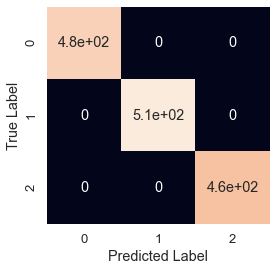

In [246]:
sns.set(font_scale = 1.2)
def plot_conf_mat(y_test, pred2):
    fig.ax = plt.subplots(figsize = (4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, pred2), annot = True, cbar = False)
    plt.xlabel("Predicted Label") # Predictions go on the x-axis
    plt.ylabel('True Label') #True labels go on the y-axis
    
plot_conf_mat(y_test, pred2)

In [247]:
# Setup random seed
np.random.seed(42)

# Setup random hypyerparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for randomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

## KNN - K Nearest Neighbor
This is usually used when we do not have the names of the classifier.

In [248]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1) # This means k = 1
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [249]:
# Predicting
pred3 = knn.predict(X_test)

In [250]:
pred3

array([2, 2, 1, ..., 1, 2, 1])

In [251]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred3))
print('\n')
print (confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      1.00      1.00       514
           2       1.00      1.00      1.00       458

    accuracy                           1.00      1450
   macro avg       1.00      1.00      1.00      1450
weighted avg       1.00      1.00      1.00      1450



[[478   0   0]
 [  0 514   0]
 [  0   0 458]]


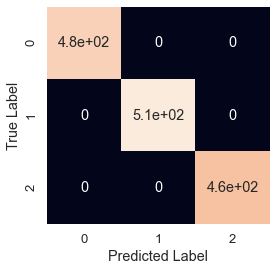

In [252]:
sns.set(font_scale = 1.2)
def plot_conf_mat(y_test, pred3):
    fig.ax = plt.subplots(figsize = (4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, pred3), annot = True, cbar = False)
    plt.xlabel("Predicted Label") # Predictions go on the x-axis
    plt.ylabel('True Label') #True labels go on the y-axis
    
plot_conf_mat(y_test, pred2)

## Feature Importance
This is basically asking the model which of the features contributed the most to predicting the activity in which the person is doing.

it is a way of asking which feature contributed the most to the outcome of the model and how did it contribute.

This is different for each machine learning.

In [253]:
# Feature importance for Logistic Regression

clf = LogisticRegression(C = 0.20433597178569418, solver ='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [254]:
# checking coefficients (coef)
clf.coef_

array([[-0.20030083, -1.68656295,  0.11176925, -0.02412636,  0.09931549,
         0.02838219,  1.26800547, -0.92773073, -3.47979647,  0.01205077,
         2.52000303,  0.0187499 ],
       [ 0.20317749,  1.14347091,  1.83018387, -0.02598293, -0.10654216,
        -0.02982526,  0.05808117,  4.7950569 ,  6.78402645,  3.23818341,
         0.32395903, -1.27843801],
       [-0.13857885,  0.49167164, -1.88293331,  0.24812376,  0.1235043 ,
        -0.04791297, -1.31983104, -2.00823884, -0.31692046, -1.76079756,
        -1.79892226, -0.33090552]])

In [255]:
# match coef's of features to columns
feature_dict = dict(zip(masterSensorData.columns, list(clf.coef_[0])))
feature_dict

{'Timestamp': -0.2003008311678093,
 'Acc_X': -1.6865629511588958,
 'Acc_Y': 0.11176925407658474,
 'Acc_Z': -0.024126358775741652,
 'AngV_X': 0.0993154916065007,
 'AngV_Y': 0.028382188372983244,
 'AngV_Z': 1.2680054730540422,
 'Mag_X': -0.9277307297315297,
 'Mag_Y': -3.4797964685064944,
 'Mag_Z': 0.012050774278281256,
 'Orin_X': 2.520003027672514,
 'Orin_Y': 0.01874990347958663}

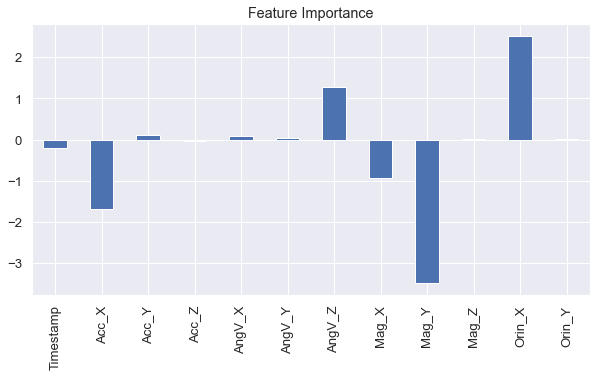

In [256]:
# Visualizing the feature importance

feature_df = pd.DataFrame(feature_dict, index = [0])

feature_df.T.plot.bar(title = 'Feature Importance', figsize = (10,5), legend = False);

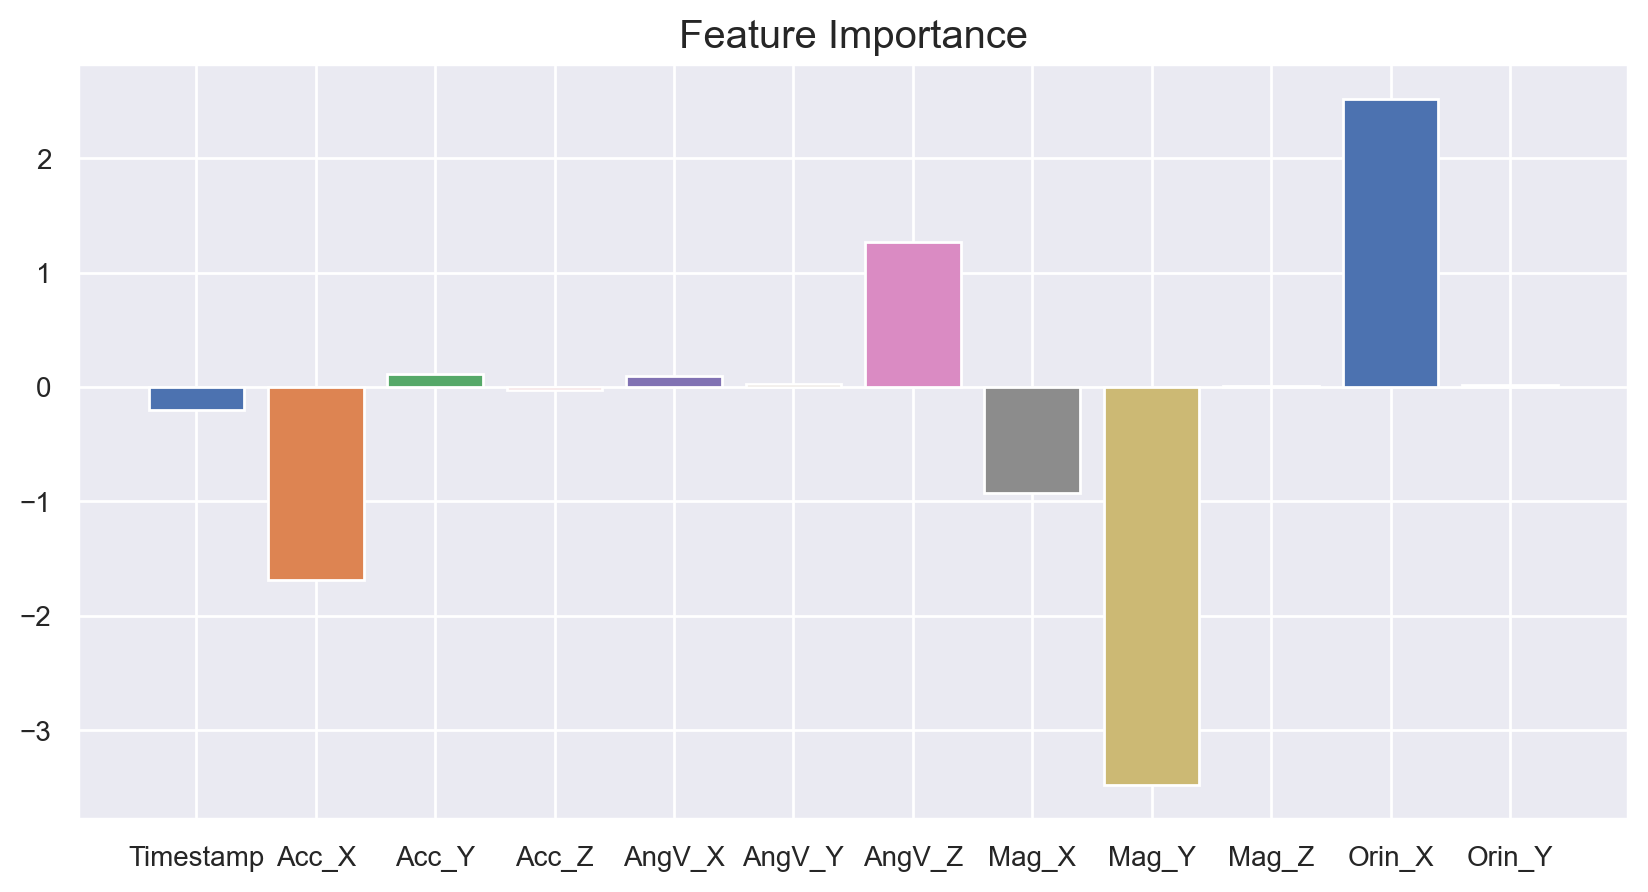

In [257]:
#Larger plot showing "Feature Importance"

plt.figure(figsize=(10,5),dpi=200)
for gg,bb in feature_df.items():
    
    plt.bar(gg,bb)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("Feature Importance")

In [258]:
# Feature importance for Random Forest

import time

from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rFC, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean)

Elapsed time to compute the importances: 59.774 seconds


### Trying to see what Nueral Network can do compared to the previously used models